# Jugando con imágenes

En este Jupyter Notebook la idea es probar los conceptos basicos de trabajar con imagenes usando scikit-image

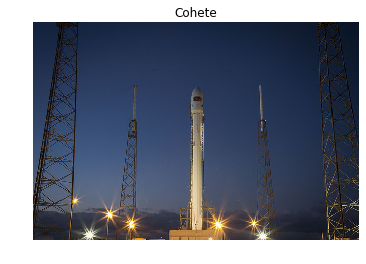

In [6]:
# Probamos que tenemos la libreria
from skimage import data
import matplotlib.pyplot as plt

rocket_image = data.rocket()

plt.imshow(rocket_image)
plt.title("Cohete")
plt.axis('off')
plt.show()